# EJERCICIO 3:

Consideramos la red as-22july06.gml creada por Mark Newman que contiene la estructura de los
sistemas autónomos de internet relevada a mediados de 2006.

In [1]:
#paquetes 
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline
import os
#from random import shuffle
import math
import pandas as pd
from scipy import optimize


Generamos el grafo

In [2]:
G = nx.read_gml('as-22july06.gml')

Definimos algunos objetos de interes

In [3]:
N = len(G.nodes())
degree = [degree for node,degree in G.degree()]  #a partir de un diccionario nos quedamos con los values en una lista 
set_degree = set(degree)                         #lo hacemos un set para quitarle las repeticiones 
len(degree), len(set_degree)                     #para tener una idea de cuantas repeticiones hay 

(22963, 161)

# a. BINEADO LINEAL 

In [4]:
#vamos a recorrer todo el set con k. Por ej: Para k = 1, P1 es un vector donde cada elemento es el grado k = 1 al recorrer degree 
#que tiene las repeticiones. Entonces, el tamaño de ese vector es la cantidad de nodos que tienen grado k = 1. 
#asi es que P es un vector donde cada elemento es la cantidad de nodos con grado k normalizado por la cantidad de nodos total.

P = []

for k in set_degree:
    Pk = [d for d in degree if d==k]
    P.append(len(Pk)/N)

In [5]:
#chequeo que si sumo todos los elementos obtengo 1
sum(P)

1.0000000000000036

In [6]:
ls_set_degree = list(set_degree)                             #lo ponemos como una lista para poder orderlo para que el elemento i-esimo
                                                             #se corresponda con el i-esimo del vector P para plotear 
    
dict_distdg = {ls_set_degree[i]:P[i] for i in range(len(P))} #armamos un diccionario donde la key es el grado y el value la probabilidad 


Text(0,0.5,'$P_k$')

C:\Users\Elizabeth\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


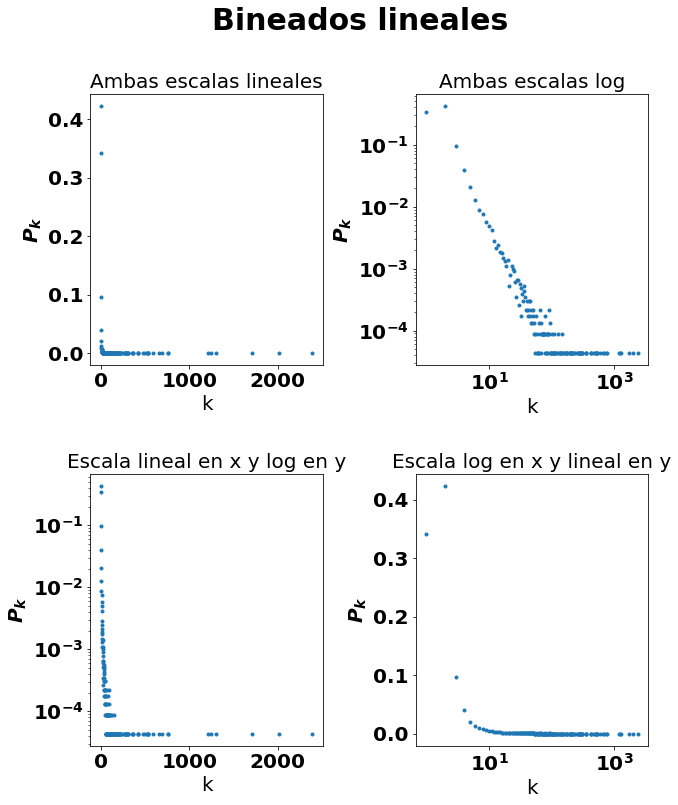

In [7]:
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

f = plt.figure(figsize = (10,12))
f.subplots_adjust(hspace=0.4, wspace=0.4)
f.suptitle('Bineados lineales',fontweight = "bold", size = 30) 
sub1 = f.add_subplot(221)
plt.plot(ls_set_degree,P,'.')
#sub1.set_title('Ambas escalas lineales', size = 20)
#sub1.set_xlabel("k")
#sub1.set_ylabel("$P_k$")
sub2 = f.add_subplot(222)
plt.loglog(ls_set_degree,P,'.')
#sub2.set_title('Ambas escalas logaritmicas', size = 20)
#sub2.set_xlabel("k")
#sub2.set_ylabel("$P_k$")
sub3 = f.add_subplot(223)
plt.semilogy(ls_set_degree,P,'.')
#sub3.set_title('Escala lineal en x y logaritmica en y', size = 20)
sub4 = f.add_subplot(224)
plt.semilogx(ls_set_degree,P,'.')
#sub3.set_xlabel("k")
#sub3.set_ylabel("$P_k$")
###################################
sub1.set_title('Ambas escalas lineales', size = 20)
sub2.set_title('Ambas escalas log', size = 20)
sub3.set_title('Escala lineal en x y log en y', size = 20)
sub4.set_title('Escala log en x y lineal en y', size = 20)
sub1.set_xlabel("k")
sub1.set_ylabel("$P_k$")
sub2.set_xlabel("k")
sub2.set_ylabel("$P_k$")
sub3.set_xlabel("k")
sub3.set_ylabel("$P_k$")
sub4.set_xlabel("k")
sub4.set_ylabel("$P_k$")

Dentro de los graficos hechos para el bineado lineal, en el que ambas escalas son logaritmicas se puede ver notoriamente que existe un rango de k tal que la distribucion es lineal decreciente. Sin embargo, existe un problema. A  medida que va creciendo k se ve que existen varios k para el mismo valor de $P_k$ (apilamiento) produciendo que los puntos se organicen como lineas horizontales.  

# a. BINEADO LOGARITMICO EN BASE 2 

$P_{k_i} = \frac{N_i}{\Delta b_i} = \frac{N_i}{2^i}$

$b = [0, 2^0, 2^1, 2^2, ... ,2^{i_{max}}], b_i = 2^i$

In [8]:
#buscamos el i_max que tiene nuestra distribucion para hacer la serie 
imax = int(math.log(ls_set_degree[-1],2))+1
print(imax)
print(2**9)


9
512


In [9]:
#armamos la serie b 
serie = []
serie.append(0)

for k in range(imax):
    serie.append(serie[k]+2**k)
    
serie

[0, 1, 3, 7, 15, 31, 63, 127, 255, 511]

In [10]:
#Iteramos sobre cada elemento de la serie y para plog iteramos sobre la lista de los grados y vamos armando un vector donde 
#cada elemento es el grado. Va a haber un vector para cada elemento de la serie donde sus elementos van a ser el grado para 
#cada uno de los nodos que cumpla que el grado este contenido entre dos elementos sucesivos de la serie. 
#Entonces, Plog va guardando el tamano de cada uno de esos vectores (cantidad de nodos con grado comprendido en ese bin) normalizado
#por la cantidad total de nodos. 

Plog = []

for i in range(len(serie)):
    plog = [d for d in degree if serie[i] < d <= serie[i] + 2**i] 
    Plog.append(len(plog)/N) 
    
Plog

[0.34141880416321907,
 0.5190523886251797,
 0.08134825588990985,
 0.03165962635544136,
 0.014458041196707747,
 0.006314505944345251,
 0.003048382180028742,
 0.0012193528720114968,
 0.0008274180202935157,
 0.0003919348517179811]

In [11]:
#queremos ver que esta normalizada la distribucion.
sum(Plog)

0.9997387100988548

Text(0,0.5,'$P_k$')

C:\Users\Elizabeth\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


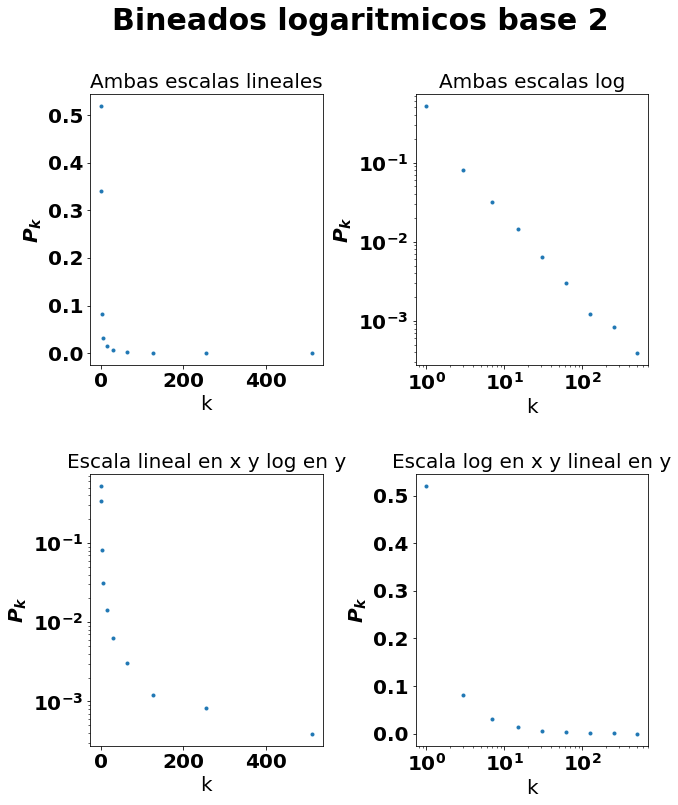

In [12]:
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

f = plt.figure(figsize = (10,12))
f.subplots_adjust(hspace=0.4, wspace=0.4)
f.suptitle('Bineados logaritmicos base 2',fontweight = "bold", size = 30) 
sub1 = f.add_subplot(221)
plt.plot(serie,Plog,'.')
sub2 = f.add_subplot(222)
plt.loglog(serie,Plog,'.')
sub3 = f.add_subplot(223)
plt.semilogy(serie,Plog,'.')
sub4 = f.add_subplot(224)
plt.semilogx(serie,Plog,'.')
###################################
sub1.set_title('Ambas escalas lineales', size = 20)
sub2.set_title('Ambas escalas log', size = 20)
sub3.set_title('Escala lineal en x y log en y', size = 20)
sub4.set_title('Escala log en x y lineal en y', size = 20)
sub1.set_xlabel("k")
sub1.set_ylabel("$P_k$")
sub2.set_xlabel("k")
sub2.set_ylabel("$P_k$")
sub3.set_xlabel("k")
sub3.set_ylabel("$P_k$")
sub4.set_xlabel("k")
sub4.set_ylabel("$P_k$")

Dentro de los graficos hechos para el bineado logaritmico de base 2, en el que ambas escalas son logaritmicas se puede ver notoriamente que existe un rango de k tal que la distribucion es lineal. 

Text(0,0.5,'$P_k$')

C:\Users\Elizabeth\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


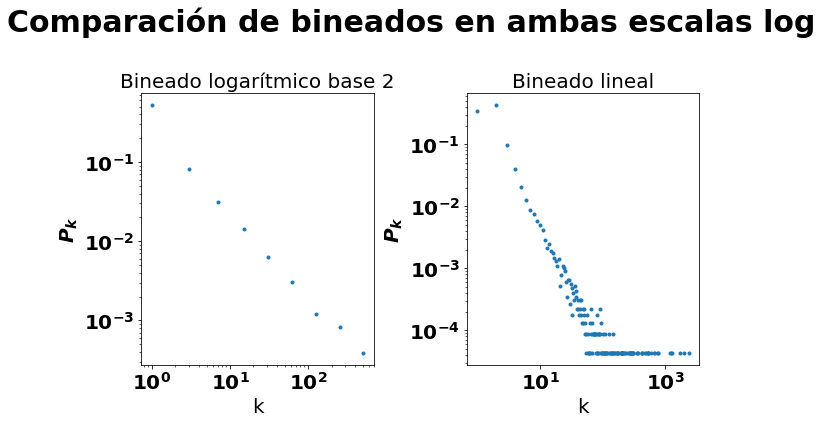

In [13]:
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

f = plt.figure(figsize = (10,12))
f.subplots_adjust(hspace=0.4, wspace=0.4)
f.suptitle('Comparación de bineados en ambas escalas log',fontweight = "bold", size = 30) 
sub1 = f.add_subplot(221)
plt.loglog(serie,Plog,'.')
sub2 = f.add_subplot(222)
plt.loglog(ls_set_degree,P,'.')
sub1.set_title('Bineado logarítmico base 2', size = 20)
sub2.set_title('Bineado lineal', size = 20)
sub1.set_xlabel("k")
sub1.set_ylabel("$P_k$")
sub2.set_xlabel("k")
sub2.set_ylabel("$P_k$")


Poniendo ambas escalas log, es claro que en un ploteo de bineado logaritmico en base 2 se aprecia de forma mas clara el comportamiento de la red libre escala porque en el caso lineal se ve que para un mismo valor de $P_k$ le corresponden distintos valores k 
lo cual no permite visualizar correctamente el comportamiento lineal. Al tomar un bineado logarítimico se agrupan los k en la serie 
$b = [0, 2^0, 2^1, 2^2, ... ,2^{i_{max}}], b_i = 2^i$ y se tiene un único valor del $P_i$ que corresponde con ese elemento de la serie $b_i$ tal que hace un promedio 
entonces es claro visualizar la relación lineal y hacer un ajuste sobre ese grafico en vez de en el bineado lineal. 

# b. EL AJUSTE PARA ENCONTRAR EL PARAMETRO DE ESCALA 

In [14]:
##########
# Fitting the data -- Least Squares Method
##########

# Power-law fitting is best done by first converting
# to a linear equation and then fitting to a straight line.
# Note that the `logyerr` term here is ignoring a constant prefactor.
#
#  y = a * x^b
#  log(y) = log(a) + b*log(x)
#

#####################
#####################serie tiene su primer elemento que es cero.. entonces se lo sacamos porque no podemos hacer el log sino. 
def recortar(x):
    xf = []
    for i in range(len(x)-1):
        xf.append(x[i+1])
    return xf
 
xdata = recortar(serie)
ydata = recortar(Plog)

####################
#esta es la funcion que queremos fitear 
powerlaw = lambda x, amp, index: amp * (x**index)

###################
#es mejor fitear una lineal y despues volver a la powerlaw con los parametros que obtenemos
from scipy import optimize

logx = np.log10(xdata)
logy = np.log10(ydata)


fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y: (y - fitfunc(p, x))                                                #me lo que vamos a minimizar


pinit = [1.0, -1.0]                                                                
#elegimos unos valores ad hoc y vemos que funcionaron sino probariamos distintos                                             

out = optimize.leastsq(errfunc, pinit,args=(logx, logy), full_output=1)                     


pfinal = out[0]
covar = out[1]
print(pfinal)
print(covar)

index = pfinal[1]
amp = 10.0**pfinal[0]                                                                  

[-0.47583394 -1.11854948]
[[ 0.43054041 -0.22101113]
 [-0.22101113  0.15291621]]


parametro de orden de Power Law = 1.1185494761412604


C:\Users\Elizabeth\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family [] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


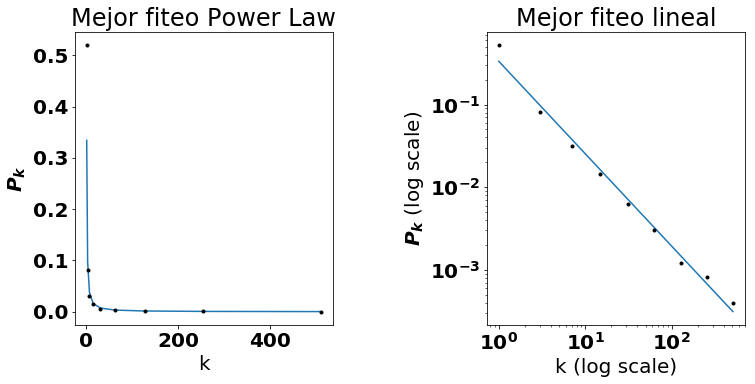

In [15]:

font = { 'family' : '',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

f = plt.figure(figsize = (12,14))
f.subplots_adjust(hspace=0.6, wspace=0.6)
sub1 = f.add_subplot(221)
plt.plot(xdata, powerlaw(xdata, amp, index))                               # Fit
plt.plot(xdata, ydata, 'k.')                                               # Data
plt.title('Mejor fiteo Power Law')
plt.xlabel('k')
plt.ylabel('$P_k$')
sub2 = f.add_subplot(222)
plt.loglog(xdata, powerlaw(xdata, amp, index))
plt.loglog(xdata, ydata, 'k.')  # Data
plt.title('Mejor fiteo lineal')
plt.xlabel('k (log scale)')
plt.ylabel('$P_k$ (log scale)')


print('parametro de orden de Power Law =', -index)

Para corroborar el valor del parametro de orden hacemos un fiteo lineal de matplotlib a los datos linealizados (haciendoles log10) pues vimos que en esa escala el comportamiento es lineal. 
Notese que no fue necesario hacer un cutoff a partir de un k o hasta un determinado k para considerar un comportamiento lineal. 

parametro de orden de ajuste lineal 1.1185494765731623


C:\Users\Elizabeth\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family [] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


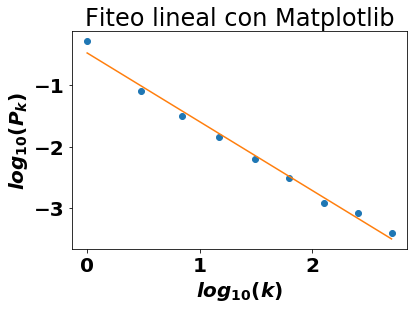

In [16]:
from scipy import stats

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(logx,logy)
line = [(slope * i + intercept) for i in logx]

plt.plot(logx,logy,'o', logx, line)
plt.title('Fiteo lineal con Matplotlib')
plt.xlabel('$log_{10}(k)$')
plt.ylabel('$log_{10}(P_k)$')
print('parametro de orden de ajuste lineal', -slope)

Entonces, vemos que por ambos ajustes hallamos el mismo valor del parametro de orden $\gamma = 1.1$. El hecho de poder hallar dicho parametro nos esta diciendo que en efecto es una power law el comportamiento. Y que la mejor forma de apreciarlo es con el bindeado logaritico en base 2 en ambas escalas logaritmicas.